## Introduction
In this report, I investigate the Dimethylsulfide (DMS) concentration at sea surface level. 

## Methodology
In this study, we use two models CNRM-ESM2-1 (average of 5 ensmbles) and UKESM-1-0-LL (5 averaged ensembles) that predicts the DMS concentrations and compare their predictions to the observed DMS from Vali et al. (2019). The observed DMS concentration in Vali et al.(2019) was paramertized based on the observed chlorophyl concentraion from Modis-Aqua and SeaWifs for the periods from 2003 to 2014, and 1998 to 2007, respectively. 

## Results and Discussion

In [41]:
# load useful packages
import xarray as xr
xr.set_options(display_style='html')
import intake
import cftime
import matplotlib.pyplot as plt
from matplotlib import cm
import cartopy 
import cartopy.crs as ccrs
import functions
import s3fs
import pandas as pd
from dask.diagnostics import ProgressBar
import cartopy.crs as ccrs
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import numpy as np
import matplotlib as mpl
%matplotlib inline

In [42]:
# access and open the bucket
s3 = s3fs.S3FileSystem(key="K1CQ7M1DMTLUFK182APD", secret="3JuZAQm5I03jtpijCpHOdkAsJDNLNfZxBpM15Pi0", client_kwargs=dict(endpoint_url="https://rgw.met.no"))
# list avilable data in the bucket
#s3.ls('escience2022/Ada/monthly')
dir = 'escience2022/Ada/monthly'
files = [file for file in s3.ls(dir) if 'dmsos' in file ]

['escience2022/Ada/monthly/dmsos_Omon_CNRM-ESM2-1_esm-hist_r1i1p1f2_gn_185001-201412.nc',
 'escience2022/Ada/monthly/dmsos_Omon_CNRM-ESM2-1_historical_r10i1p1f2_gn_185001-201412.nc',
 'escience2022/Ada/monthly/dmsos_Omon_CNRM-ESM2-1_historical_r1i1p1f2_gn_185001-201412.nc',
 'escience2022/Ada/monthly/dmsos_Omon_CNRM-ESM2-1_historical_r2i1p1f2_gn_185001-201412.nc',
 'escience2022/Ada/monthly/dmsos_Omon_CNRM-ESM2-1_historical_r3i1p1f2_gn_185001-201412.nc',
 'escience2022/Ada/monthly/dmsos_Omon_CNRM-ESM2-1_historical_r4i1p1f2_gn_185001-201412.nc',
 'escience2022/Ada/monthly/dmsos_Omon_CNRM-ESM2-1_historical_r5i1p1f2_gn_185001-201412.nc',
 'escience2022/Ada/monthly/dmsos_Omon_CNRM-ESM2-1_historical_r6i1p1f2_gn_185001-201412.nc',
 'escience2022/Ada/monthly/dmsos_Omon_CNRM-ESM2-1_historical_r7i1p1f2_gn_185001-201412.nc',
 'escience2022/Ada/monthly/dmsos_Omon_CNRM-ESM2-1_historical_r8i1p1f2_gn_185001-201412.nc',
 'escience2022/Ada/monthly/dmsos_Omon_CNRM-ESM2-1_historical_r9i1p1f2_gn_185001-2

The concentration of DMS at the surface Ocean (DMSOS herein) is extracted from two models: a) UKESM1-0-LL and b) CNRM-ESM2-1 for the historical experiment for different ensembles and the mean over the same list of member_id is calculated for both models, repectively.

In [43]:
## for UKESM
#list of member-id that we average over
list_member_id = ['1', '2', '3', '4','8','9']
list_ds = []
for imember, member in enumerate(list_member_id):
    remote_files_UK = 's3://escience2022/Ada/monthly/dmsos_Omon_UKESM1-0-LL_historical_r'+member+'*.nc'
    remote_files_UK = s3.glob(remote_files_UK)
    fileset = [s3.open(file) for file in remote_files_UK]
    list_ds.append(xr.open_mfdataset(fileset, combine='by_coords'))
## merge all the ensembles files 
ds_UKESM = xr.concat(list_ds,"member_id")
with ProgressBar():
    ds_dmsos_UKESM = ds_UKESM.dmsos.mean(dim=['member_id']).compute()
ds_dmsos_UKESM

[########################################] | 100% Completed | 179.99 s


<xarray.DataArray 'dmsos' (time: 1980, j: 330, i: 360)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * time       (time) object 1850-01-16 00:00:00 ... 2014-12-16 00:00:00
  * j          (j) int32 0 1 2 3 4 5 6 7 8 ... 322 323 324 325 326 327 328 329
  * i          (i) int32 0 1 2 3 4 5 6 7 8 ... 352 353 354 355 356 357 358 359
    latitude   (j, i) float32 -84.11 -84.11 -84.11 -84.11 ... 50.51 50.23 50.01
    longitude  (j, i) float32 73.5 74.5 75.5 76.5 ... 72.93 72.95 72.96 72.99

In [44]:
## for CNRM
#same list of member-id as in UKESM
list_member_id2 = ['1', '2', '3', '4','8','9']
list_ds_CN = []
for imember2, member2 in enumerate(list_member_id2):
    remote_files_CN = 's3://escience2022/Ada/monthly/dmsos_Omon_CNRM-ESM2-1_historical_r'+member2+'*.nc'
    remote_files_CN = s3.glob(remote_files_CN)
    fileset2 = [s3.open(file) for file in remote_files_CN]
    list_ds_CN.append(xr.open_mfdataset(fileset2,combine="nested",compat="override"))
ds_CNRM = xr.concat(list_ds_CN,"member_id")
with ProgressBar():
    ds_dmsos_CNRM = ds_CNRM.dmsos.mean(dim=['member_id']).compute()
ds_dmsos_CNRM


[########################################] | 100% Completed | 312.51 s


<xarray.DataArray 'dmsos' (time: 1980, y: 294, x: 362)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
    lat      (y, x) float64 -78.79 -78.79 -78.79 -78.79 ... 50.23 50.01 50.01
    lon      (y, x) float64 72.5 73.5 74.5 75.5 76.5 ... 73.05 73.04 73.0 72.99
    depth    float64 0.0
  * time     (time) datetime64[ns] 1850-01-16T12:00:00 ... 2014-12-16T12:00:00
Dimensions without coordinates: y, x

Here, we choose two contrasting areas of interest for both models to investigate whether DMS surface concentration would be different. Those areas are: a) Greenland Sea (herein GLS) and b) Laptev Sea (herein LPS).
In the following, the mean of DMSOS over the whole historical period is calculated and the resulting maps are plotted for both models over the GLS and LPS areas. 

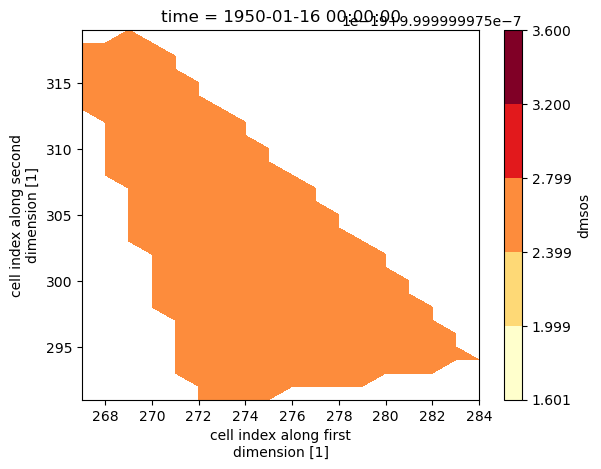

In [65]:
##  Greenland Sea for UKESM model
dmsset_GLarea_UKESM = ds_dmsos_UKESM.where((ds_dmsos_UKESM.longitude >= -10)
                                           & (ds_dmsos_UKESM.longitude <= 10) 
                                           & (ds_dmsos_UKESM.latitude <= 85) 
                                           & (ds_dmsos_UKESM.latitude >= 70),
                         drop=True).compute()
## test plotting one time from the data array
dmsset_GLarea_UKESM.sel(time=cftime.Datetime360Day(1950, 1, 16, 
                                                   has_year_zero=True)).plot.contourf(cmap='YlOrRd')


In [81]:
dms_AnnMeanAllHistrorical_UKESM_GL = dmsset_GLarea_UKESM.mean(dim='time',keep_attrs=True).compute() 
dms_AnnMeanAllHistrorical_UKESM_GL

<xarray.DataArray 'dmsos' (j: 29, i: 18)>
array([[          nan,           nan,           nan,           nan,
                  nan, 1.7947232e-06, 1.8042913e-06, 1.7950645e-06,
        1.7848375e-06,           nan,           nan,           nan,
                  nan,           nan,           nan,           nan,
                  nan,           nan],
       [          nan,           nan,           nan,           nan,
                  nan, 1.8324512e-06, 1.8388608e-06, 1.8323543e-06,
        1.8163109e-06, 1.8039924e-06, 1.8025213e-06, 1.8208096e-06,
        1.8514638e-06,           nan,           nan,           nan,
                  nan,           nan],
       [          nan,           nan,           nan,           nan,
        1.7942205e-06, 1.8311694e-06, 1.8520128e-06, 1.8547883e-06,
        1.8493050e-06, 1.8435029e-06, 1.8419904e-06, 1.8517516e-06,
        1.8691853e-06, 1.8918142e-06, 1.9193333e-06, 1.9463971e-06,
                  nan,           nan],
       [          nan,           nan,           nan,           nan,
        1.8238080e-06, 1.8450515e-06, 1.8564770e-06, 1.8633610e-06,
        1.8604054e-06, 1.8579399e-06, 1.8627405e-06, 1.8772546e-06,
        1.9001117e-06, 1.9221184e-06, 1.9375277e-06, 1.9465101e-06,
        1.9447068e-06, 1.9423376e-06],
...
       [1.1146860e-06, 1.1018823e-06, 1.0936876e-06, 1.0871610e-06,
        1.0810539e-06,           nan,           nan,           nan,
                  nan,           nan,           nan,           nan,
                  nan,           nan,           nan,           nan,
                  nan,           nan],
       [1.1039598e-06, 1.0935676e-06, 1.0872878e-06, 1.0860794e-06,
        1.0856420e-06,           nan,           nan,           nan,
                  nan,           nan,           nan,           nan,
                  nan,           nan,           nan,           nan,
                  nan,           nan],
       [1.1085212e-06, 1.0982201e-06, 1.0934904e-06, 1.0915219e-06,
                  nan,           nan,           nan,           nan,
                  nan,           nan,           nan,           nan,
                  nan,           nan,           nan,           nan,
                  nan,           nan],
       [          nan,           nan, 1.0958296e-06,           nan,
                  nan,           nan,           nan,           nan,
                  nan,           nan,           nan,           nan,
                  nan,           nan,           nan,           nan,
                  nan,           nan]], dtype=float32)
Coordinates:
  * j          (j) int32 291 292 293 294 295 296 297 ... 314 315 316 317 318 319
  * i          (i) int32 267 268 269 270 271 272 273 ... 279 280 281 282 283 284
    latitude   (j, i) float32 70.69 70.64 70.58 70.51 ... 80.84 80.45 80.05
    longitude  (j, i) float32 -16.4 -14.9 -13.4 -11.9 ... 40.26 41.8 43.22 44.53

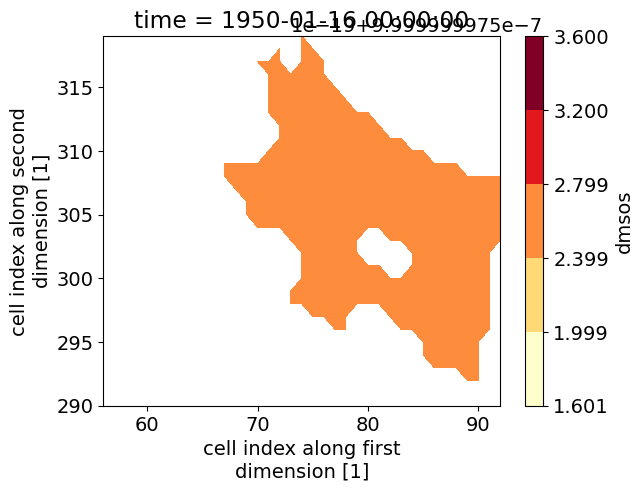

In [82]:
## Laptev sea for UKESM
dmsosset_LapSarea_UKESM = ds_dmsos_UKESM.where((ds_dmsos_UKESM.longitude>=100) 
                                       & (ds_dmsos_UKESM.longitude<=160) 
                                       & (ds_dmsos_UKESM.latitude <= 80)  
                                       & (ds_dmsos_UKESM.latitude >= 70),
                         drop=True).compute()
dmsosset_LapSarea_UKESM.sel(time=cftime.Datetime360Day(1950, 1, 16, 
                                                   has_year_zero=True)).plot.contourf(cmap='YlOrRd')



In [83]:
dms_AnnMeanAllHistrorical_UKESM_LapS = dmsosset_LapSarea_UKESM.mean(dim='time',
                                                                    keep_attrs=True).compute() 
dms_AnnMeanAllHistrorical_UKESM_LapS

<xarray.DataArray 'dmsos' (j: 30, i: 37)>
array([[          nan,           nan,           nan, ...,           nan,
                  nan,           nan],
       [          nan,           nan,           nan, ...,           nan,
                  nan,           nan],
       [          nan,           nan,           nan, ..., 1.7849119e-06,
                  nan,           nan],
       ...,
       [          nan,           nan,           nan, ...,           nan,
                  nan,           nan],
       [          nan,           nan,           nan, ...,           nan,
                  nan,           nan],
       [          nan,           nan,           nan, ...,           nan,
                  nan,           nan]], dtype=float32)
Coordinates:
  * j          (j) int32 290 291 292 293 294 295 296 ... 314 315 316 317 318 319
  * i          (i) int32 56 57 58 59 60 61 62 63 64 ... 85 86 87 88 89 90 91 92
    latitude   (j, i) float32 63.49 63.78 64.06 64.34 ... 84.93 85.09 85.22
    longitude  (j, i) float32 117.6 118.5 119.5 120.5 ... 140.1 144.9 149.9

/tmp/ipykernel_926/2322597739.py:48: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


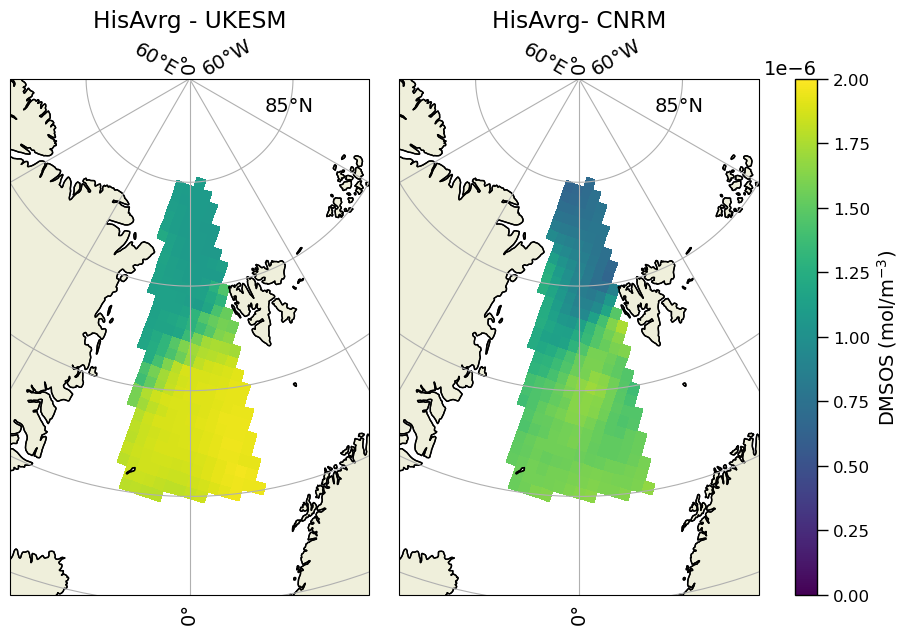

In [77]:
mpl.rcParams.update({'font.size':14})
fig, ax = plt.subplots(1,2,figsize=(8,6),subplot_kw={'projection':ccrs.NorthPolarStereo()})
ax[0].set_extent([-20, 20,65,90], ccrs.PlateCarree())
ax[1].set_extent([-20, 20,65,90], ccrs.PlateCarree())
pl_UKESM=ax[0].pcolormesh(dms_AnnMeanAllHistrorical_UKESM_GL.longitude,
                       dms_AnnMeanAllHistrorical_UKESM_GL.latitude,
              dms_AnnMeanAllHistrorical_UKESM_GL, 
    vmin=0,vmax=2.0e-6,          
    transform=ccrs.PlateCarree(),
    # transform=ccrs.AlbersEqualArea(),
    # levels=10,
        )
ax[0].add_feature(cartopy.feature.LAND, zorder=1, edgecolor='black')
ax[0].set_title('HisAvrg - UKESM')
ax[0].gridlines(draw_labels=True)
ax[0].coastlines()

pl_CNRM=ax[1].pcolormesh(dms_AnnMeanAllHistrorical_CNRM_GL.lon,
                       dms_AnnMeanAllHistrorical_CNRM_GL.lat,
              dms_AnnMeanAllHistrorical_CNRM_GL, 
    vmin=0,vmax=2.0e-6,          
    transform=ccrs.PlateCarree(),
    # transform=ccrs.AlbersEqualArea(),
    # levels=10,
        )
ax[1].add_feature(cartopy.feature.LAND, zorder=1, edgecolor='black')
ax[1].set_title('HisAvrg- CNRM')
ax[1].gridlines(draw_labels=True)
ax[1].coastlines()
#fig.colorbar(pl_CMIP6,shrink=0.4)
############# COLORBAR properties ##############
# create the ax based on an ax dimensions
axins = inset_axes(ax[1],
                    width="6%",  
                    height="100%",
                    loc='right',
                    borderpad=-3
                   )

# add colorbar from ax
cbar = fig.colorbar(pl_UKESM, cax=axins, orientation='vertical')
cbar = fig.colorbar(pl_CNRM, cax=axins, orientation='vertical')
# style(axins)
cbar.set_label('DMSOS (mol/m$^{-3}$)', fontsize=14)

# thickness of spines around the colorbar
cbar.outline.set_linewidth(1)
fig.tight_layout()
def style_cbar(ax):
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.tick_params(axis='both', which='both', length=8, width=1, direction='out')

style_cbar(axins)
plt.savefig('Fig1_DMS_SurfConc_UKESM_vs_CNRM_Greenland_HistoricalAvrg_report.png')

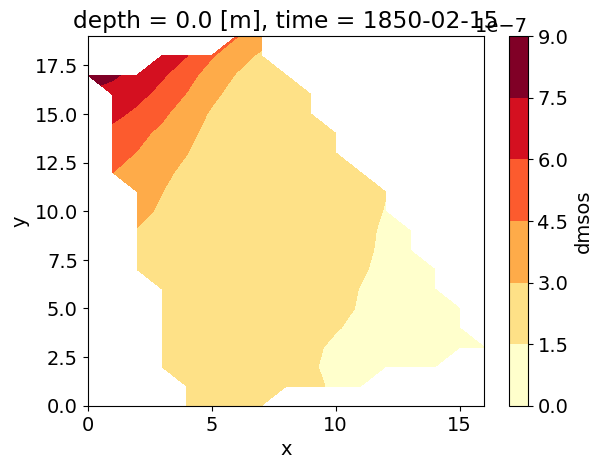

In [86]:
# Greenland Sea for CNRM model
dmsset_GLarea_CNRM = ds_dmsos_CNRM.where((ds_dmsos_CNRM.lon >= -10)
                                           & (ds_dmsos_CNRM.lon <= 10) 
                                           & (ds_dmsos_CNRM.lat <= 80) 
                                           & (ds_dmsos_CNRM.lat >= 70),
                         drop=True).compute()
## test plotting one time from the data array
dmsset_GLarea_CNRM.sel(time='1850-02-16T12:00:00.000000000',
                       method='nearest').plot.contourf(cmap='YlOrRd')

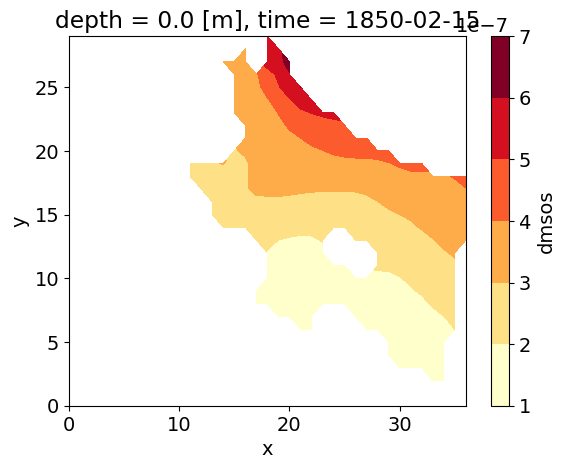

In [87]:
# Laptev Sea Sea for CNRM model
dmsset_LapSarea_CNRM = ds_dmsos_CNRM.where((ds_dmsos_CNRM.lon >= 100)
                                           & (ds_dmsos_CNRM.lon <= 160) 
                                           & (ds_dmsos_CNRM.lat <= 80) 
                                           & (ds_dmsos_CNRM.lat >= 70),
                         drop=True).compute()
## test plotting one time from the data array
dmsset_LapSarea_CNRM.sel(time='1850-02-16T12:00:00.000000000',method='nearest').plot.contourf(cmap='YlOrRd')

In [88]:
dms_AnnMeanAllHistrorical_CNRM_GL = dmsset_GLarea_CNRM.mean(dim='time',keep_attrs=True).compute() 
dms_AnnMeanAllHistrorical_CNRM_GL

<xarray.DataArray 'dmsos' (y: 20, x: 17)>
array([[          nan,           nan,           nan,           nan,
        1.5416709e-06, 1.5680727e-06, 1.6166572e-06, 1.6301352e-06,
                  nan,           nan,           nan,           nan,
                  nan,           nan,           nan,           nan,
                  nan],
       [          nan,           nan,           nan,           nan,
        1.5533044e-06, 1.5723190e-06, 1.5711150e-06, 1.5796461e-06,
        1.5931038e-06, 1.6159323e-06, 1.6328424e-06, 1.6504852e-06,
                  nan,           nan,           nan,           nan,
                  nan],
       [          nan,           nan,           nan, 1.5192711e-06,
        1.5393737e-06, 1.5717397e-06, 1.5590002e-06, 1.5789319e-06,
        1.5837815e-06, 1.5992256e-06, 1.6084273e-06, 1.6193978e-06,
        1.6090521e-06, 1.6084459e-06, 1.6260318e-06,           nan,
                  nan],
       [          nan,           nan,           nan, 1.5101092e-06,
        1.5262971e-06, 1.5601603e-06, 1.5338177e-06, 1.5503790e-06,
        1.5610842e-06, 1.5815967e-06, 1.5957606e-06, 1.6081676e-06,
        1.5979514e-06, 1.5870224e-06, 1.5910410e-06, 1.6067087e-06,
        1.6654834e-06],
...
       [          nan, 1.2230009e-06, 1.1025603e-06, 9.9993883e-07,
        9.2498414e-07, 9.4387894e-07, 1.1398298e-06, 1.4003122e-06,
        1.6175453e-06, 1.7476892e-06,           nan,           nan,
                  nan,           nan,           nan,           nan,
                  nan],
       [1.2591204e-06, 1.1736881e-06, 1.0696351e-06, 9.7066902e-07,
        8.8881245e-07, 8.7533061e-07, 9.5915277e-07, 1.1780428e-06,
        1.4701709e-06,           nan,           nan,           nan,
                  nan,           nan,           nan,           nan,
                  nan],
       [          nan,           nan,           nan, 9.2865190e-07,
        8.4200053e-07, 8.1824436e-07, 8.7041650e-07, 1.0677275e-06,
                  nan,           nan,           nan,           nan,
                  nan,           nan,           nan,           nan,
                  nan],
       [          nan,           nan,           nan,           nan,
                  nan,           nan, 7.2741761e-07, 8.6930731e-07,
                  nan,           nan,           nan,           nan,
                  nan,           nan,           nan,           nan,
                  nan]], dtype=float32)
Coordinates:
    lat      (y, x) float64 70.64 70.58 70.51 70.43 ... 78.17 77.88 77.57 77.26
    lon      (y, x) float64 -14.9 -13.4 -11.9 -10.42 ... 21.47 23.2 24.86 26.44
    depth    float64 0.0
Dimensions without coordinates: y, x

In [89]:
dms_AnnMeanAllHistrorical_CNRM_LapS = dmsset_LapSarea_CNRM.mean(dim='time',keep_attrs=True).compute() 
dms_AnnMeanAllHistrorical_CNRM_LapS

<xarray.DataArray 'dmsos' (y: 30, x: 37)>
array([[          nan,           nan,           nan, ...,           nan,
                  nan,           nan],
       [          nan,           nan,           nan, ...,           nan,
                  nan,           nan],
       [          nan,           nan,           nan, ..., 1.1870256e-06,
                  nan,           nan],
       ...,
       [          nan,           nan,           nan, ...,           nan,
                  nan,           nan],
       [          nan,           nan,           nan, ...,           nan,
                  nan,           nan],
       [          nan,           nan,           nan, ...,           nan,
                  nan,           nan]], dtype=float32)
Coordinates:
    lat      (y, x) float64 63.49 63.78 64.06 64.34 ... 84.73 84.93 85.09 85.22
    lon      (y, x) float64 117.6 118.5 119.5 120.5 ... 135.7 140.1 144.9 149.9
    depth    float64 0.0
Dimensions without coordinates: y, x

/tmp/ipykernel_926/635808294.py:48: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


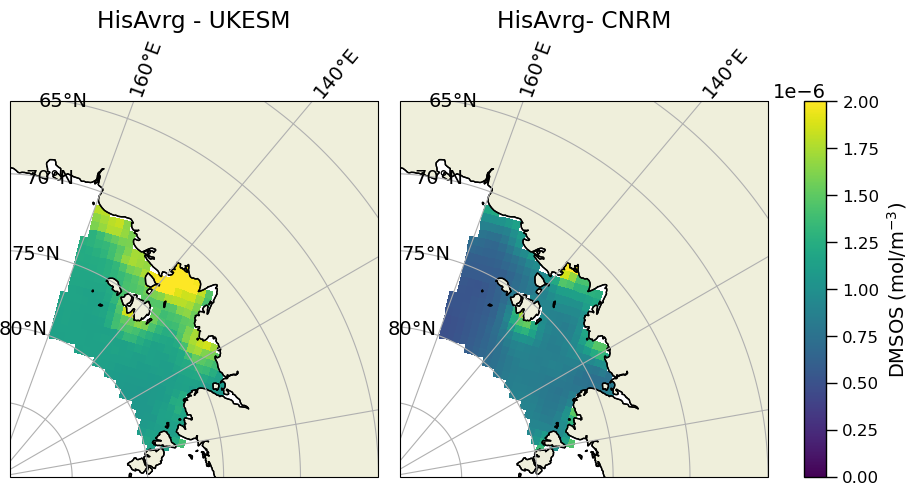

In [91]:
mpl.rcParams.update({'font.size':14})
fig, ax = plt.subplots(1,2,figsize=(8,6),subplot_kw={'projection':ccrs.NorthPolarStereo()})
ax[0].set_extent([90,170,65,85], ccrs.PlateCarree())
ax[1].set_extent([90,170,65,85], ccrs.PlateCarree())
pl_UKESM=ax[0].pcolormesh(dms_AnnMeanAllHistrorical_UKESM_LapS.longitude,
                       dms_AnnMeanAllHistrorical_UKESM_LapS.latitude,
              dms_AnnMeanAllHistrorical_UKESM_LapS, 
    vmin=0,vmax=2.0e-6,          
    transform=ccrs.PlateCarree(),
    # transform=ccrs.AlbersEqualArea(),
    # levels=10,
        )
ax[0].add_feature(cartopy.feature.LAND, zorder=1, edgecolor='black')
ax[0].set_title('HisAvrg - UKESM')
ax[0].gridlines(draw_labels=True)
ax[0].coastlines()

pl_CNRM=ax[1].pcolormesh(dms_AnnMeanAllHistrorical_CNRM_LapS.lon,
                       dms_AnnMeanAllHistrorical_CNRM_LapS.lat,
              dms_AnnMeanAllHistrorical_CNRM_LapS, 
    vmin=0,vmax=2.0e-6,          
    transform=ccrs.PlateCarree(),
    # transform=ccrs.AlbersEqualArea(),
    # levels=10,
        )
ax[1].add_feature(cartopy.feature.LAND, zorder=1, edgecolor='black')
ax[1].set_title('HisAvrg- CNRM')
ax[1].gridlines(draw_labels=True)
ax[1].coastlines()
#fig.colorbar(pl_CMIP6,shrink=0.4)
############# COLORBAR properties ##############
# create the ax based on an ax dimensions
axins = inset_axes(ax[1],
                    width="6%",  
                    height="100%",
                    loc='right',
                    borderpad=-3
                   )

# add colorbar from ax
cbar = fig.colorbar(pl_UKESM, cax=axins, orientation='vertical')
cbar = fig.colorbar(pl_CNRM, cax=axins, orientation='vertical')
# style(axins)
cbar.set_label('DMSOS (mol/m$^{-3}$)', fontsize=14)

# thickness of spines around the colorbar
cbar.outline.set_linewidth(1)
fig.tight_layout()
def style_cbar(ax):
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.tick_params(axis='both', which='both', length=8, width=1, direction='out')

style_cbar(axins)
plt.savefig('Fig2_DMS_SurfConc_UKESM_vs_CNRM_LaptevSea_HistoricalAvrg_report.png')

Over both GLS and LPS Areas, UKESM predicts larger DMSOS mean concentration than CNRM (factor of ~2) over the whole histroical period (Figures 1,2). However, both models predicts less surface concentrations than what has been observed over both areas and in general over the whole Arctic.    